In [ ]:
%matplotlib inline

# Assignment 3

**DUE: Sunday November 7, 2021 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [ ]:
NAME = "Abdelrahman Alnajjar"
STUDENT_ID = "*******"

## Question 1 - Logistic Regression
---
In this question, you will build a system for predicting patient deaths in the Intensive Care Unit (ICU) using the large [PhysioNet Computing in Cardiology Challenge 2012 dataset](https://physionet.org/content/challenge-2012/1.0.0/). For each patient in the dataset, demographic variables and time series of physiological variables were collected during their stay in the ICU. 

The risk prediction system you will build could in principle be used to flag patients as being at risk of death so that physicians could intervene and improve their outcome. To be confident about the impact of such a system, you would need to run an experiment. In this question, you will use a model in order to estimate the potential impact of the system.

The data you will be working with is all available from [PhysioNet](https://physionet.org/challenge/2012/). You will be looking at only the data in "Training set A". The patient data files are [https://archive.physionet.org/challenge/2012/set-a.zip](here), and the outcomes file is [https://archive.physionet.org/challenge/2012/Outcomes-a.txt](here).





#### Downloading and Reading in the Data

First, we download the physiological data and read in patient outcomes file (links above).

We want this data to be read from text files and assembled into a dataframe. To do so, please run the following code which will first define a function that reads a text file, and then runs that function on all the files and assembles the outputs into a single dataframe.

#### Downloading the data

In [ ]:
!wget https://archive.physionet.org/challenge/2012/set-a.zip -O ./set-a.zip
import zipfile
with zipfile.ZipFile('./set-a.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

--2021-11-08 00:56:43--  https://archive.physionet.org/challenge/2012/set-a.zip
Resolving archive.physionet.org (archive.physionet.org)... 128.30.30.88
Connecting to archive.physionet.org (archive.physionet.org)|128.30.30.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7938449 (7.6M) [application/zip]
Saving to: ‘./set-a.zip’

./set-a.zip         100%[===================>]   7.57M  21.1MB/s    in 0.4s    

2021-11-08 00:56:45 (21.1 MB/s) - ‘./set-a.zip’ saved [7938449/7938449]



#### Reading in data

In [ ]:
import pandas as pd
import numpy as np
import glob

def comp_patient(patdat, attrs):
    patdat[patdat == -1.0] = float('NaN')
    patdat_dict = {}
    for attr in attrs:
        patdat_dict[attr] = [patdat["Value"][patdat["Parameter"]==attr].mean(axis = 0)]
    return patdat_dict


attrs = ["Age", "Gender", "Height", "Weight", "Urine", 
         "HR", "Temp", "NIDiasABP", "SysABP", "DiasABP", "pH",
         "PaCO2", "PaO2", "Platelets", "MAP", "K", "Na", "FiO2", "GCS", "RecordID"]


full_dat  = pd.DataFrame(columns = attrs)

# Now let's take the list "all_pat_dat" and assemble it into a dataframe.
filenames = sorted(glob.glob("/content/set-a/*.txt"))
for filename in filenames:
    data = open(filename)
    patient_dat_full = pd.read_csv(data, delimiter=',')
    patient_dat = pd.DataFrame.from_dict(comp_patient(patient_dat_full, attrs))
    full_dat = full_dat.append(patient_dat)

outcome_dat = pd.read_csv("https://archive.physionet.org/challenge/2012/Outcomes-a.txt")
outcome_dat[outcome_dat == -1] = float('NaN') # set all -1 to NaNs
full_dat_out = full_dat.merge(outcome_dat, left_on='RecordID', right_on='RecordID')
full_dat_out.replace([np.inf, -np.inf], np.nan)

col_means = full_dat_out.mean()
# Set everything that's NaN to the mean of that column:

# Note: we do this for simplicity. Strictly speaking, you should
# only use the training set to compute the column means

for i in range(full_dat_out.shape[1]):
    mask = np.isnan(np.array(full_dat_out.iloc[:,i]))
    full_dat_out.iloc[mask, i] = col_means[i]

In [ ]:
#outcome_dat.shape
full_dat_out.shape
#full_dat

(4000, 25)

### a) Understanding the Data (2 points)
Looking at the files and the code provided above, explain:


*   What is the size of your input data? how many parameters exist in the data?
*   Exaplain what the code provided above is trying to achieve.



####**My Answer:** 
The size if the input data is : 4000 (we can use full_dat_out.shape)\
The number of parameters exist in the data is: 25, also by the same above command, so this is based on full_dat_out\ 
Now the above code is trying to read the data from the textfile that contains information about the patients who are in the ICU, and then we are adding the columns and its data in full_dat  with pd.DataFrame(columns = attrs)  


### b) Run Logistic Regression (9 points)


Divide your data into training, validation, and test sets (60-20-20). 

Use the features `HR`, `Gender`, `age`, `temperature`, `weight`, `height`, `PaO2`, and  `PaCO2`, and fit a logistic regression model to predict in-hospital death. 

In [ ]:
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = full_dat_out[['HR','Gender', 'Age','Temp', 'Weight','Height','PaO2','PaCO2']] 
y = outcome_dat[['In-hospital_death']]

X = X.values
y = y.values

# split the data so that the train is 80% (60% for trainig and 20% for validation) and 20% for test
X_train_, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.2, random_state=144)

#split the training set into training set and validation set 
# test_size=0.25 since 25% of 80% is 20%
X_train, X_vald, y_train, y_vald = train_test_split(X_train_, y_train_, test_size=0.25, random_state=144)


# fit the model 
clf = LogisticRegression(random_state=144).fit(X_train,y_train)
print('Training Score: ', clf.score(X_train, y_train))
print('Testing Score: ', clf.score(X_test, y_test))



Training Score:  0.8633333333333333
Testing Score:  0.8525


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### c) ROC Curve (10 points)

Write a function that, for a given threshold (prob. threshold), calculates both the False Positive Rate (proportion of non-deaths identified as deaths by the model) and True Positive Rate (proportion of deaths correctly identified as such by the model) for your regression model. 

For 100 threshold values equally spaced from 0 to 1, plot the True Positive Rate vs. the False Positive Rate. Use the validation set.

This plot is known as an ROC curve. 


Random Prediction: AUROC = 0.500
Logistic Regression: AUROC = 0.672


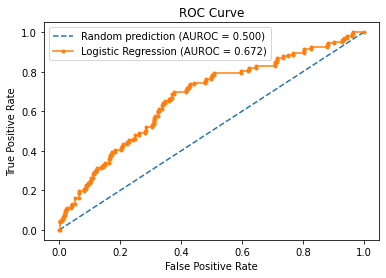

In [ ]:
### YOUR CODE HERE ###

# The ROC will summarize the prediction performance of a 
# classification model at all classification thresholds 
# as a fucntion of the true positive rate and false 
# positve rates 

# false positive rate will be on y-axis FPR  = FP/ (TN+FN)
#(proportion of non-deaths identified as deaths by the model)

# ture positive rate will be on y-axis TPR  = TP/ (TP+FN)
# (proportion of deaths correctly identified as such by the model) 

# https://github.com/dataprofessor/code/blob/master/python/ROC_curve.ipynb

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#create prediction probaility data matrices 
r_probs = [0 for _ in range(len(y_vald))]
clf_probs = clf.predict_proba(X_vald)

clf_probs = clf_probs[:, 1]

# clacaute the area just to show the diffrence 
r_auc = roc_auc_score(y_vald, r_probs)
clf_auc = roc_auc_score(y_vald, clf_probs)

print('Random Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regression: AUROC = %.3f' % (clf_auc))

r_fpr, r_tpr, _ = roc_curve(y_vald, r_probs)
clf_fpr, clf_tpr, _ = roc_curve(y_vald, clf_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(clf_fpr, clf_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % clf_auc)

# Title
plt.title('ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()





 

<function matplotlib.pyplot.show>

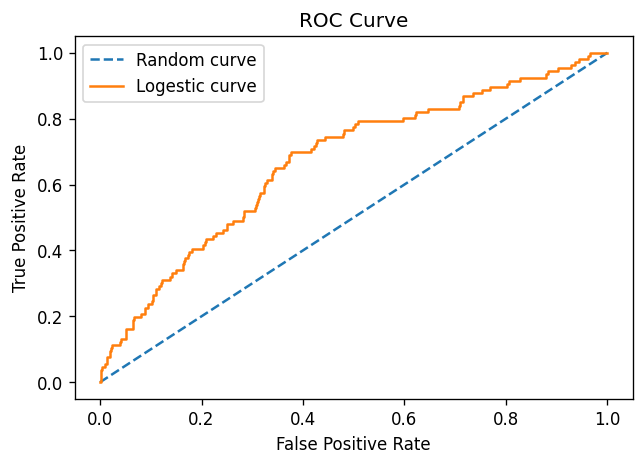

In [ ]:

## Another way
# Tutoring session
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python/31962355
# https://towardsdatascience.com/roc-curve-explained-using-a-covid-19-hypothetical-example-binary-multi-class-classification-bab188ea869c
# https://pretagteam.com/question/making-roc-curve-using-python-for-multiclassification

import matplotlib.pyplot as plt 
import matplotlib as mpl
from sklearn import metrics

def find_tpr_and_fpr(t): 
  t_p = 0 
  f_n = 0 
  f_p = 0 
  t_n = 0 
  y_pred = (clf.predict_proba(X_vald)[:, 1] >= t).astype(int) 
  for i in range(len(y_pred)): 
    if y_pred[i] ==1 and y_pred[i] ==y_vald[i]:
      t_p+=1
    if y_pred[i] ==0 and y_pred[i] ==y_vald[i]:
      t_n+=1
    if y_pred[i] ==0 and y_pred[i] !=y_vald[i]:
      f_n+=1
    if y_pred[i] ==1 and y_pred[i] !=y_vald[i]:
      f_p+=1
  fpr = f_p / (f_p + t_n)
  tpr = t_p / (t_p+f_n)
  return fpr , tpr

threshold_limit = 100
threshold = np. linspace(0,1,threshold_limit)
fprs, tprs = [],[]
for t in threshold: 
  fpr, tpr = find_tpr_and_fpr(t) 
  fprs.append(fpr) 
  tprs.append(tpr)

y_test_hat = clf.predict_proba(X_test)
y_vald_hat = clf.predict_proba(X_vald)
fpr_test, tpr_test, test_thresholds = metrics.roc_curve(y_test, y_test_hat[:,1])
fpr_vald, tpr_vald, vald_tresholds = metrics.roc_curve(y_vald, y_vald_hat[:,1]) 
ns_probs = [0 for _ in range(len(y_vald))]

dpi = 120 
mpl.rcParams['figure.dpi'] =dpi
ns_fpr,ns_tpr,_ = metrics.roc_curve(y_vald,ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--',label = 'Random curve')
plt.plot(fpr_vald, tpr_vald, label='Logestic curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title('ROC Curve')

plt.show



### d) Interpreting the ROC Curve (4 points)

Using the plot generated in Part (c), what is the False Positive Rate associated with correctly identifying 80% of patients at risk for death in the ICU? Why might a high false positive rate be appropriate in this setting? You can read the answer off the ROC curve plot.


####**My Answer:** 
the False Positive Rate associated with correctly identifying 80% of patients at risk for death in the ICU is about 0.81%, and we a false positve rate be appropriate for this setting is becasue at this point, the patient migh be in urgent need and action must be taken by the doctors 


### e) Modelling Doctors' Decision-Making (6 points)

For this part, produce a short report that answers all the questions below. Include code that produces the numbers that you need.

At the beginning of their shift, a doctor reviews their patients' charts, and decides what intervention is needed for each patient. In the following parts, we will be trying to improve this process. We will consider a simplified version of what is going on. Suppose that if the doctor intervenes correctly, the patient will not die; suppose that the doctor has 60 minutes to look through 25 patient charts; and suppose that the probability of missing the correct treatment if the doctor spends $t$ minutes on reviewing a file is

$$P(\textrm{fail}) = \exp(-t^2/100).$$


1. If the doctor reviews all the files, spends an equal amount of time on each chart, and there are 10 patients who will die without the correct intervention, how many patients are expected to die, if the doctor intervenes when they see that that's needed? What is the percentage of patients who are expected to die, out of 25?

2. Suppose now that the doctor is looking through all the patient charts in the validation set. They would have proportionately more time: $(N/25)\times 60$ minutes in total (where $N$ is the total number of patients in the set). How many patients would be expected to die, if the doctor intervenes correctly when they know they should do that?

3. Now, suppose that the doctor only reviews the files of patients for whom the model outputs a probability of greater than $20\%$. This would give the doctor more time to look through each file, but the doctor would never be able to intervene in the cases of patients form whom the output is $20\%$ or smaller. How many patients would be expected to die?



####**My Answer:** 
1) there are 10 patients who need the doctor's intervention or else they will die without the correct intervention, so in this case N=10, if each patient chart has the same amount of time and we have 25 patient charts then t= 60/25 =2.4 and and N =10, therefore the number of patients are expected to die, if the doctor intervenes when they see that that's needed is N*P(t) = 10*P(2.4) = 9.44 patients (cannot be 9.44 in real life so it must be 9 patients), and the percentage of patients who are expected to die, out of 25 is 9.44%. Therefore. they do need doctor's intervension

2) in the validation set, N=800, and total time = (800/25)*60 = 1920 minutes, and each patient will get 1920 / 800 minutes = 2.4, there fore the probability will be P(2.4) for each patient and we have 106 pateints so 106*P(2.4) =100.06, and so we will have 100 patients that will die.

3) using the valifation set and having a total number of 800 patients, so we have (800/25)*60 minutes total, which is 1920 minutes in total, and since doctor only reviews the files of patients for whom the model outputs a probability of greater than 20%, then the number of patients is about 140, so each pateint will have (1920/140) minutes or 13.7 minutes, therefore the number of patients * P(t) = 140*P(13.7), and so 21 patients will die




### f) Modelling Doctors' Decision-Making - Revisited (7 points)


In this Part, you will explore the policy implications of using our model in an understaffed hospital. 

Suppose that we are considering a policy of only reviewing the files of patients whose probability of death is above a threshold `thr`. Each chart would be given an equal amount of time, and the total amount of time will be $(N/25)\times 60$.

Using the model from previous part, plot the total number of expected deaths under the policy vs. the threshold. Using the plot, what is the best threshold to use that would minimize the number of deaths?

You should compute the expected number of deaths for the thresholds `np.arange(0, 1, 0.01)`.

Use the validation set.




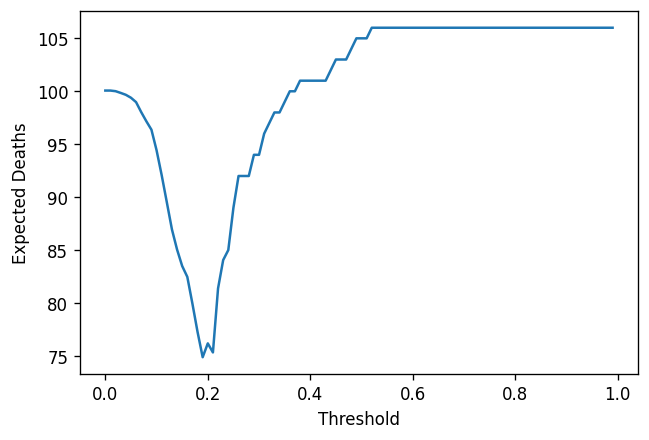

In [ ]:
### YOUR CODE HERE ###
import math
thr = np.arange(0,1,0.01)
y_est = clf.predict_proba(X_vald)

def calc_result():
  for t in thr:
    c = 0 
    index = 0
    dyingCount1 = 0
    dyingCount2 = 0
    for i in y_est:
      if i[1] > t:
        c+=1
        if y_vald[index] == 1:
          dyingCount2 += 1
      elif y_vald[index] == 1:
        dyingCount1 +=1
      index +=1
    t = 1
    if c > 0:
      t = ((800/25)*60)/c
    fail_probability = math.exp((-t**2)/100)
    deathCount = fail_probability * dyingCount2 + dyingCount1
    res.append(deathCount)
  return res

res = []
res= calc_result()
plt.plot(thr,res)
plt.xlabel("Threshold")
plt.ylabel("Expected Deaths")
plt.show()

          



The optimal threshold to use is around 19 or 20, since the number if death is about 74 or 75

### g) Modelling Doctors' Decision-Making - Testing (7 points)

On the test set, compare the total number of expected deaths under the best policy that was selected in Part (f) to reviewing each patient's file. In relative terms (i.e., as a percentage), how many lives would be saved, if the assumptions underlying our simulation are accurate?

In [ ]:
import math
y_est = clf.predict_proba(X_test)

c  = 0
index  = 0
dyingCount1 = 0
dyingCount2 = 0
for i in y_est:
  if i[1] > 0.19:
    c+=1
    if y_test[index] == 1:
      dyingCount2 +=1
  elif y_test[index] == 1:
    dyingCount1 +=1
  index +=1
t = 1
if c > 1:
  t = ((800/25)*60)/c
fail_probability  = math.exp((-t**2)/100)
deathCount =(fail_probability * dyingCount2 + dyingCount1)
result.append(deathCount)
saved = dyingCount2 - deathCount+dyingCount1

#model outputs a probability of greater than  20%
print(c,"For the patients with output greater than 20%") 
#dyingCount1
print(dyingCount1,"patients with unpredicted death")
#dyingCount2
print(dyingCount2,"pathients with predicted death")
print(100*saved/(dyingCount1+dyingCount2),"% patients that are saved")



179 For the patients with output greater than 20%
73 patients with unpredicted death
45 pathients with predicted death
26.066810690271325 % patients that are saved


## Question 2 - Neural Networks
---

We will train a fully connected neural networks to recognize face images of cats and dogs. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [ ]:
data_dir = 'pets'
image_width = 32
image_height = 32
batch_size = 10

### a) Load the Pets Dataset (2 points)
There are 110 images of size $32\times32$. Run the following code block to import the data. Keep in mind that they will be downloaded from the internet, so it may take a while.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download the data
downloaded = drive.CreateFile({'id':"1cA-dQ4tXusV0hQLK3JieI8GXQdvxNwbs"})
downloaded.GetContentFile('pets.npy')  
data = np.load("pets.npy",allow_pickle=True)

In [ ]:
# Create X and y
X, y = (data[()]['X'], data[()]['y'])

In [ ]:
# Get class names and create ID
class_names = ['cat', 'dog']
class_dict = {i:class_name for i,class_name in enumerate(class_names)}

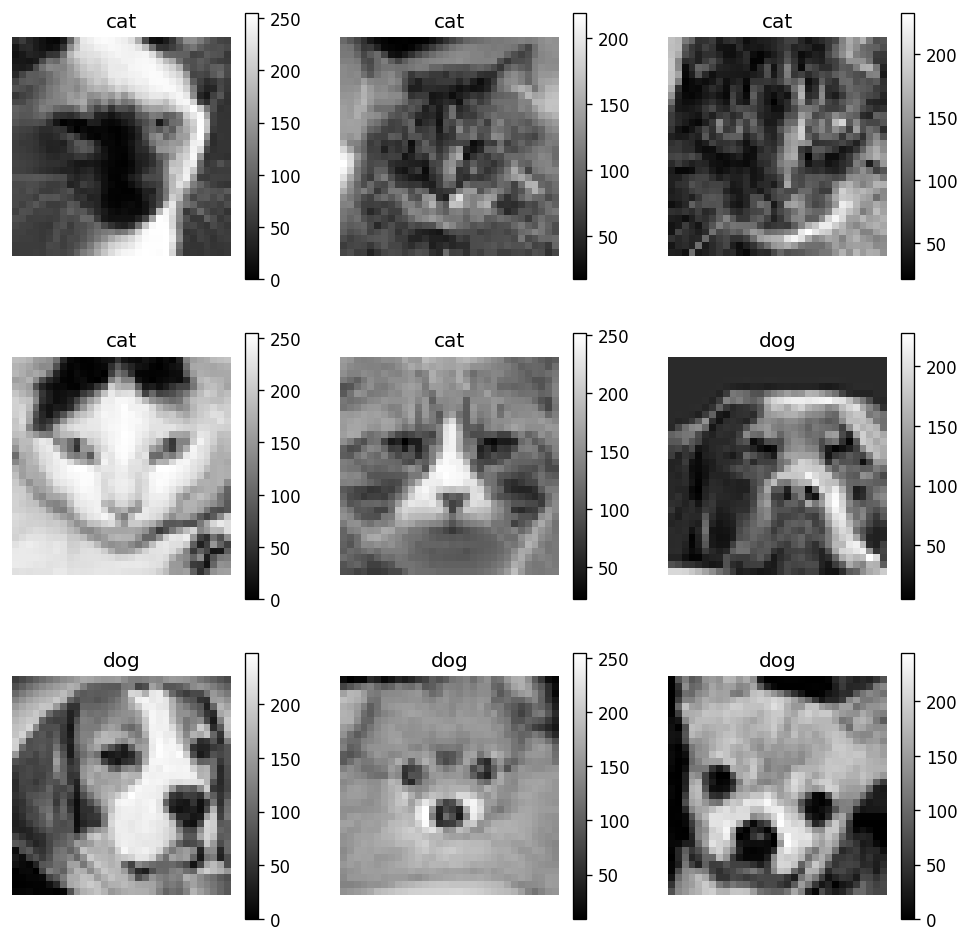

In [ ]:
# Plot some images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for count, i in enumerate(range(0,110, 13)):
    ax = plt.subplot(3, 3, count + 1)
    plt.imshow(X[i],cmap='gray')
    plt.colorbar()
    plt.title(class_names[y[i]])
    plt.axis("off")

In [ ]:

max_value = np.max(X)
max_value = np.min(X)

Answer the following questions:

1.) What are the data types for X and y?

2.) What are the shapes of X and y?

3.) What is the minimum and maximum value of X?

####**My Answer:** 
1) X is an array of 110 "images" each with 32\*32 array (corresponds to their 32\*32 size) and y is either 0, or 1, means it is a cat or not a cat, and so X has integers\
2) (110, 32, 32) is the shape of X, where 110 corresponds to the number of images, and 32 is the number of pixles of the width, and 32 is the number of pixles in the height, and so 32*32 is the total number of pixels that will be used as the input for training, and (110,) is the shape of y just corresponds to the final result (0 or 1) (cat or dog)\
3) max_value = np.max(X) = 255, so the maximum is 255\
min_value = np.min(X) = 0, so the minimum is 0 


### b) Data Preprocessing (3 points)
As you can see above, the pixel values are in the [0,255]. This is the normal range for images. Recall from the previous lectures and excercises that we need to normalize our data.

In order to normalize our data to [0,1] we use the equation:

$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In our case we can assume that $x_{min}=0$ and $x_{max}=255$, this is a safe assumption since we are working with image data.

This means that for image data, if we want to normlize to [0,1] the equation simplifies to:

$$img_{norm}=\frac{img}{255}$$

Anytime you work with image data in any kind of model you will be normalizing with this equation. Unless the range you want to normalize is different. Sometimes you want to normalize between [-1,1], for that you would use a slightly different equation.


Normalize the X data using the above equation and save as train_images.

In [ ]:
train_images =  (X-np.min(X))/(np.max(X)-np.min(X))
# another way
#train_images = train_images/255   
train_images

array([[[0.17647059, 0.23137255, 0.14901961, ..., 0.31372549,
         0.26666667, 0.25490196],
        [0.09019608, 0.15294118, 0.16470588, ..., 0.30588235,
         0.32156863, 0.28627451],
        [0.06666667, 0.09411765, 0.14509804, ..., 0.32941176,
         0.31764706, 0.22352941],
        ...,
        [0.25098039, 0.24313725, 0.24313725, ..., 0.19607843,
         0.23137255, 0.24313725],
        [0.23921569, 0.23921569, 0.23529412, ..., 0.20392157,
         0.21176471, 0.22352941],
        [0.23137255, 0.23529412, 0.23921569, ..., 0.21176471,
         0.20392157, 0.22352941]],

       [[0.38823529, 0.42745098, 0.46666667, ..., 0.48627451,
         0.44705882, 0.41176471],
        [0.40784314, 0.44313725, 0.50980392, ..., 0.43137255,
         0.4       , 0.43921569],
        [0.39607843, 0.45098039, 0.49803922, ..., 0.4       ,
         0.4       , 0.36862745],
        ...,
        [0.77647059, 0.73333333, 0.72156863, ..., 0.37647059,
         0.35294118, 0.39215686],
        [0.8

If we show the image agian, you will see the values are all scaled correctly.

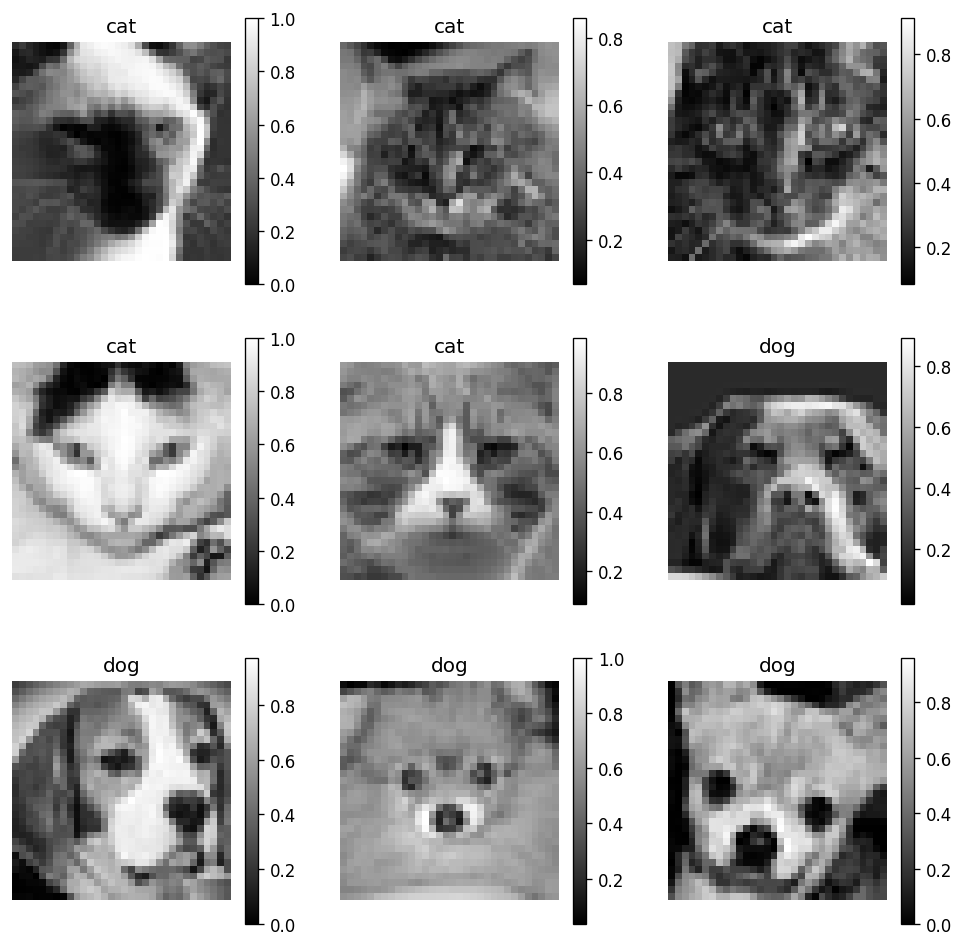

In [ ]:
# Plot images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for count, i in enumerate(range(0,110, 13)):
    ax = plt.subplot(3, 3, count + 1)
    plt.imshow(train_images[i],cmap='gray')
    plt.colorbar()
    plt.title(class_names[y[i]])
    plt.axis("off")

In [ ]:
np.max(train_images)
np.min(train_images)

0.0

What is the new minimum and maximum value of X?

####**My Answer:** 
After normalization, it is clear that the maximum value of X is 1, and the minum value of X is 0 

### c) Reshaping the Data (5 points)

Please reshpe training images to be 1024-dim (from $32 \times 32$). 

Hint: look into numpy.reshape().


In [ ]:
X.shape

(110, 32, 32)

In [ ]:
print(f'Before reshape, train_images shape: {X.shape}')

#train_images = train_images.reshape(110,1024)
train_images = train_images.reshape(len(train_images),32*32)

print(f'Before reshape, train_images shape: {train_images.shape}')


Before reshape, train_images shape: (110, 32, 32)
Before reshape, train_images shape: (110, 1024)


### d) Building a Simple Neural Network (15 points)
In the cell below, build a fully-connected feed-forward neural network with the following layers:
* **input layer** of shape 1024
* **hidden layer** with 25 neurons, and relu activation
* **output layer** with 1 neuron, and sigmoid activation

In [ ]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import *

# Build neural network
# YOUR CODE HERE

input_layer = Input(shape=(1024, ))
x = Dense(25, activation='relu')(input_layer)
x = Dense(1, activation='sigmoid')(x)

model=Model(input_layer, x)



In [ ]:
# Show a summary of your model
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 1024)]            0         
_________________________________________________________________
dense_25 (Dense)             (None, 25)                25625     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 26        
Total params: 25,651
Trainable params: 25,651
Non-trainable params: 0
_________________________________________________________________


Declare the optimizer using Stochastic Gradient Descient with learning rate of 0.001, weight decay of 1e-6 and momentum of 0.009. Compile your model using the 'binary_crossentropy' loss function and 'accuracy' as the metrics.

> Indented block



In [ ]:
# Declare optimizer
optimizer = SGD(lr=0.001, decay=1e-6, momentum=0.009)

# Compile model
# YOUR CODE HERE
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Now we will train our model to learn pet faces using train_images and the 'y' labels. Our dataset is small so we will use 10% of the data as test set data. Train your model using the following parameters:

Fit your model using the train_images, 'y' labels, a batchsize of 10, and validation split of 0.1. Train for 500 epochs.

.fit documentation: https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [ ]:
y = y.reshape(-1,1)

# Call fit on your model passing in the X, y data above, train for 500 epochs
#hist =  # YOUR CODE HERE

hist = model.fit(train_images,
                    y, 
                    epochs=500, 
                    batch_size=10, 
                    validation_split=0.1,
                    )

Epoch 1/500
10/10 [==============================] - 1s 18ms/step - loss: 0.6999 - accuracy: 0.5455 - val_loss: 0.8047 - val_accuracy: 0.4545
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5758 - val_loss: 0.8239 - val_accuracy: 0.4545
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.5758 - val_loss: 0.8226 - val_accuracy: 0.4545
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 0.6162 - val_loss: 0.8359 - val_accuracy: 0.3636
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6691 - accuracy: 0.5960 - val_loss: 0.8471 - val_accuracy: 0.1818
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6631 - accuracy: 0.6061 - val_loss: 0.8639 - val_accuracy: 0.1818
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6571 - accuracy: 0.6364 - val_loss: 0.8387 - val_accuracy: 0.2727
Epoch 8/500


In [ ]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

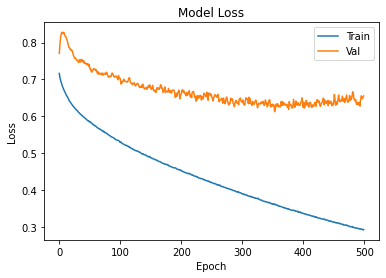

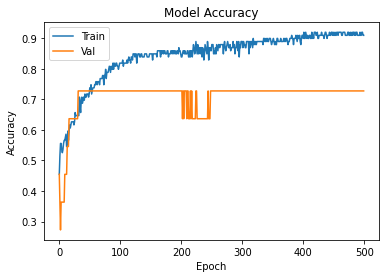

In [ ]:
# plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

For the input size, this one hidden layer neural network is probably too small. However, we can see that the model attempts to minimize the overall loss. Summarize your observations on the model's learning curves, model's overall classification accuracy on the validation set, and the least amount of loss on validation set?

####**My Answer:** 
Summarize your observations on the model's learning curves\
This is a nuerla network with only 1 hidden layer and only 25 neurons, and this means the expeted result is not high, and not close to 100%\
For the model loss curve, it is clease that with more epochs the model loss decreses and that is shown by the model loss curve, and for the training set, it is clear that as we increase the number of epochs, the loss decreses, however on the validation set the loss reaches some point at some number of epoch and then it stops decreasing and might even decrese and it is around 300 epochs\
For the accuracy model, we can also tell that for the training set, the accuracy incrases as the number of epochs, and it is reaching almost a 95% accuracy where for the validation set, the accuracy stops increasing at some point of epochs, and therefore, inreasing the number of epochs, or changing the weights in a way that it will make no positive effect on the validation set, that might lead to overfitting, since more epochs will lead to a more accuracy on the training set but not on the validation set



### e) Building a Second Neural Network (15 points)
Next, you will build a neural network with one hidden layer that is wider than the previous model's hidden layer. In the cell below, build a neural network with the following layers:
* **input layer** of shape 1024
* **hidden layer** with 100 neurons, and relu activation
* **output layer** with 1 neuron, and sigmoid activation

In [ ]:
# Build Neural network
# YOUR CODE HERE
input_layer = Input(shape=(1024, ))
x = Dense(100, activation='relu')(input_layer)
x = Dense(1, activation='sigmoid')(x)

model=Model(input_layer, x)

In [ ]:
# Show a summary of your model
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1024)]            0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               102500    
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 101       
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


Again, declare the optimizer using Stochastic Gradient Descient with learning rate of 0.001, weight decay of 1e-6 and momentum of 0.009. Compile your model using 'binary_crossentropy' loss function and 'accuracy' as the metrics.

In [ ]:
# Declare optimizer
optimizer = SGD(lr=0.001, decay=1e-6, momentum=0.009)

# Compile model
# YOUR CODE HERE
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In this sell fit your model using the train images, y labels, a batchsize of 10, and validation split of 0.1. Train for 500 epochs.

In [ ]:
y = y.reshape(-1,1)

# Call fit on your model passing in the X, y data above, train for 500 epochs
#hist = # YOUR CODE HERE

hist = model.fit(train_images,
                    y, 
                    epochs=500, 
                    batch_size=10, 
                    validation_split=0.1,
                    )


Epoch 1/500
10/10 [==============================] - 1s 18ms/step - loss: 0.7008 - accuracy: 0.5354 - val_loss: 0.5550 - val_accuracy: 0.9091
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.5253 - val_loss: 0.6064 - val_accuracy: 0.8182
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6679 - accuracy: 0.5758 - val_loss: 0.6340 - val_accuracy: 0.8182
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.6364 - val_loss: 0.6558 - val_accuracy: 0.8182
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6537 - accuracy: 0.6465 - val_loss: 0.6594 - val_accuracy: 0.7273
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6469 - accuracy: 0.6465 - val_loss: 0.6712 - val_accuracy: 0.7273
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6432 - accuracy: 0.6465 - val_loss: 0.6534 - val_accuracy: 0.8182
Epoch 8/500


In [ ]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

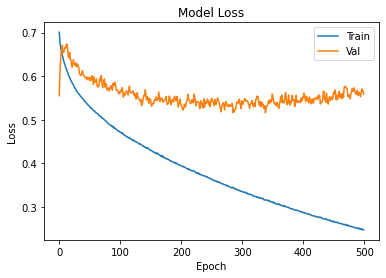

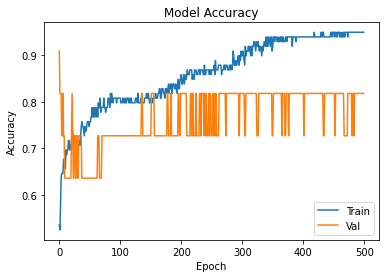

In [ ]:
# Plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

Next, summarize this models results. Consider the following questions when answering. Remember that this model has a higher learning capacity than the previous model. 

1) How did this model compare to previous model? 

2) Did it outperform the previous models? 

3) What was your model's overall classification accuracy on the validation set and the least amount of loss on validation set? 

####**My Answer:** 
1) From what I read during the learning process the accuracy was higher than the previous model, in that model there where 25 neurons, where in this model, there are 100 neuros, but still it is not accurate since there is only 1 model\
2) In this model, I can tell that the number of epochs needed to trian the model, is around 200 compared to the previous model where in needed around 300 epochs, and from the readings, it suggest that the accuracy was higher than the previous model\
3) The model's overall classification accuracy was 81.82% and the least amount of loss is 0.5584 

### f) Building a Third Neural Network (15 points)
Lastly, you will build a fully-connected neural network with two hidden layers. In the cell below, build a neural network with the following layers:
* **input layer** of shape 1024
* **hidden layer** with 100 neurons, and relu activation
* **hidden layer** with 25 neurons, and relu activation
* **output layer** with 1 neuron, and sigmoid activation

In [ ]:
from tensorflow.keras.layers import Input, Dense # only use these layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import * # you can use any optimizer

# Build Neural network
# YOUR CODE HERE

input_layer = Input(shape=(1024, ))
x = Dense(100, activation='relu')(input_layer)
x = Dense(25, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model=Model(input_layer, x)


In [ ]:
# Show a summary of your model
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1024)]            0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               102500    
_________________________________________________________________
dense_23 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 26        
Total params: 105,051
Trainable params: 105,051
Non-trainable params: 0
_________________________________________________________________


Since this model is bigger than the previous models, we will use a more powerful optimizer. Declare the optimizer as Adam with learning rate of 0.001. Compile your model using 'binary_crossentropy' loss function and 'accuracy' as the metrics.

In [ ]:
# Declare optimizer
optimizer = 'adam' # by default the learning rate = 0.001

# Compile model
# YOUR CODE HERE
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In this sell fit your model using the train images, y labels, a batchsize of 10, and validation split of 0.1. Train for 500 epochs.

In [ ]:
y = y.reshape(-1,1)

# Call fit on your model passing in the X, y. 
# Train for 500 epochs with a batch size of 10 and validation split of 0.1
#hist = # YOUR CODE HERE

hist = model.fit(train_images,
                    y, 
                    epochs=500, 
                    batch_size=10, 
                    validation_split=0.1,
                    )


Epoch 1/500
10/10 [==============================] - 1s 22ms/step - loss: 0.6916 - accuracy: 0.5657 - val_loss: 0.4933 - val_accuracy: 1.0000
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6288 - accuracy: 0.6061 - val_loss: 1.2431 - val_accuracy: 0.0000e+00
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6251 - accuracy: 0.5960 - val_loss: 0.5287 - val_accuracy: 0.7273
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 0.5496 - accuracy: 0.6869 - val_loss: 0.3344 - val_accuracy: 0.9091
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5385 - accuracy: 0.7273 - val_loss: 0.9149 - val_accuracy: 0.3636
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5685 - accuracy: 0.6869 - val_loss: 0.2294 - val_accuracy: 1.0000
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.5359 - accuracy: 0.7071 - val_loss: 1.1504 - val_accuracy: 0.0000e+00
Epoc

In [ ]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

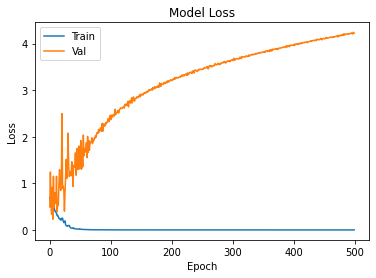

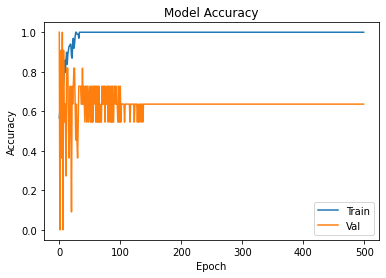

In [ ]:
# plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

Summarize this model's results. Consider the following when answering:

1) How did this model compare to previous models? 

2) Did it outperform the previous models? 

3) What was your model's overall classification accuracy on the validation set and the least amount of loss on validation set? 

4) Adam is a powerful optimizer, and may quickly converge to an a minima. Did this happen with this model?

####**My Answer:** 

1) This model is more powerful it has 2 hidden layers, and 1 input layer, and an output layer, and the accuracy of the training set was 100% but with a high number of epochs it was clear that that affected the validation set\
2) Now the number of epocsh is 500, and that affected the validation set, but did not affect the training set, and it was able to converge to a minuma very fast (we are using adam) and so we did not need the epochs to be a high number, and the accuracy for the validation set was close to 80% but as we kept changing the weights, in favor of the training set, and that affected the validation set\
3)The model's overall classification accuracy was 63.64% and the least amount of loss is 4.2205, but with less number of epochs we could reach accuracy was 0.8273% and the least amount of loss is 0.3205\
4) Yes, with adam optimizer the model was able to converge very fast and find a minima with a small number of epochs

